<a href="https://colab.research.google.com/github/sneha2003er/project/blob/main/SVM_model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
# Load images
train_fire_images = '/content/drive/MyDrive/data/dataset/img_data/train/fire'
train_default_images = '/content/drive/MyDrive/data/dataset/img_data/train/default'
train_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/train/smoke'

test_fire_images = '/content/drive/MyDrive/data/dataset/img_data/test/fire'
test_default_images ='/content/drive/MyDrive/data/dataset/img_data/test/default'
test_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/test/smoke'

In [ ]:
# load videos
train_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'
test_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'

## Import Libraries

In [ ]:
!pip install playsound

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=07d80c4fb5d2236e140582335be95d4b92be55ee0af5db9af9713bb435e64390
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [ ]:
import os
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from playsound import playsound
import smtplib


## Load and Prepare the Image Data:

In [ ]:
# Load images from a directory and label them
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return images, labels

## alarm and email notification:

In [ ]:
# Sound alarm
def sound_alarm():
    """Play an alarm sound."""
    playsound('alarm.mp3')

In [ ]:
# Send Email Notification
def send_email_notification(subject, message, to_email):
    from_email = 'your_email@gmail.com'
    from_password = 'your_password'
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(from_email, from_password)
    email_message = f"Subject: {subject}\n\n{message}"
    server.sendmail(from_email, to_email, email_message)
    server.quit()

In [ ]:
# Evaluate Predictions
def evaluate_predictions(y_true, y_pred):
    for true, pred in zip(y_true, y_pred):
        if pred == "fire":
            sound_alarm()
            send_email_notification("Fire Alert!", "Fire detected by our system. Please check immediately.", "receiver_email@example.com")
            break

In [ ]:
# Load training datasets
train_fire_imgs, train_fire_labels = load_images_from_folder(train_fire_images, 'fire')
train_default_imgs, train_default_labels = load_images_from_folder(train_default_images, 'default')
train_smoke_imgs, train_smoke_labels = load_images_from_folder(train_smoke_images, 'smoke')

# Load testing datasets
test_fire_imgs, test_fire_labels = load_images_from_folder(test_fire_images, 'fire')
test_default_imgs, test_default_labels = load_images_from_folder(test_default_images, 'default')
test_smoke_imgs, test_smoke_labels = load_images_from_folder(test_smoke_images, 'smoke')


In [ ]:
# Combine training and testing datasets
X_train = train_fire_imgs + train_default_imgs + train_smoke_imgs
y_train = train_fire_labels + train_default_labels + train_smoke_labels

X_test = test_fire_imgs + test_default_imgs + test_smoke_imgs
y_test = test_fire_labels + test_default_labels + test_smoke_labels

## Create and Train an SVM Model:

In [ ]:
# Create an SVM classifier
svm_clf = SVC(kernel='linear', C=1, probability=True, random_state=42)  # You can modify the parameters as needed

# Train the classifier
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True, random_state=42)

## Predict and Evaluate the Model on Entire Dataset:

In [ ]:
# Predict on train and test data
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

# Concatenate predictions and ground truths
all_y_true = y_train + y_test
all_y_pred = list(y_train_pred) + list(y_test_pred)

# Calculate overall accuracy
overall_accuracy = accuracy_score(all_y_true, all_y_pred)

print(f"Overall Accuracy using SVM: {overall_accuracy}")

Overall Accuracy using SVM: 0.8797184900831734


## Confusion Matrix:

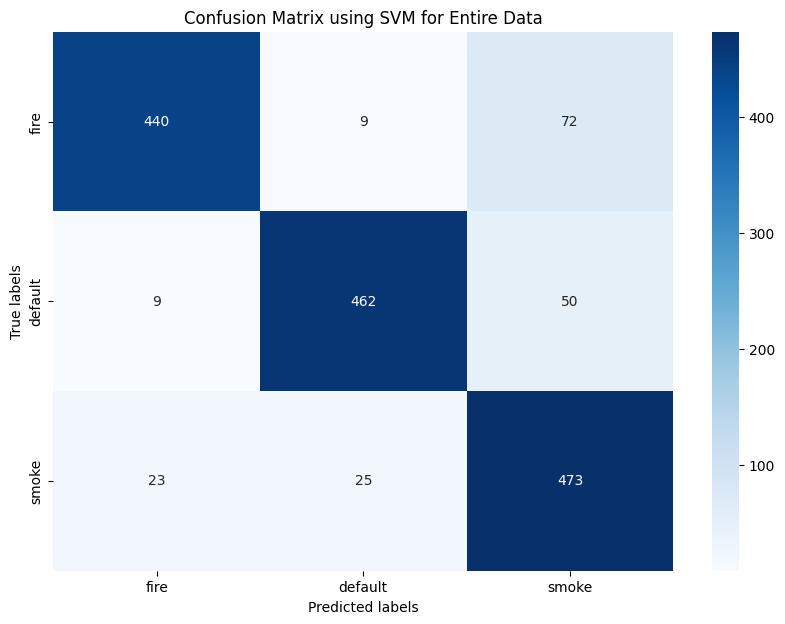

In [ ]:
# Confusion matrix for the entire data
cm = confusion_matrix(all_y_true, all_y_pred, labels=["fire", "default", "smoke"])

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["fire", "default", "smoke"],
            yticklabels=["fire", "default", "smoke"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix using SVM for Entire Data')
plt.show()

In [ ]:
# Calculate precision, recall, and F1 score for each class
precision = precision_score(all_y_true, all_y_pred, average=None)
recall = recall_score(all_y_true, all_y_pred, average=None)
f1 = f1_score(all_y_true, all_y_pred, average=None)

In [ ]:
# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(all_y_true, all_y_pred, average='weighted')
overall_recall = recall_score(all_y_true, all_y_pred, average='weighted')
overall_f1 = f1_score(all_y_true, all_y_pred, average='weighted')


In [ ]:
# Print the results
print("Class-wise Precision:", precision)
print("Class-wise Recall:", recall)
print("Class-wise F1 Score:", f1)

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1)

Class-wise Precision: [0.93145161 0.93220339 0.79495798]
Class-wise Recall: [0.88675624 0.84452975 0.90786948]
Class-wise F1 Score: [0.90855457 0.88620342 0.84767025]
Overall Precision: 0.8862043286423371
Overall Recall: 0.8797184900831734
Overall F1 Score: 0.8808094157117394
